# TD 3 | Étude de la marge EGT d'un turboréacteur

---

Objectifs du TD :

* pratiquer sur un premier use case concret d'analyse de données de moteurs d'avion
* fonctions glissantes pandas (_rolling_)
* régression linéaire

---

La table fournie contient les données moteurs disposant de l'information "marge EGT" (egthdm) issue
des rapports ACARS. Il s'agit donc uniquement de rapports extraits au décollage (TAKEOFF). On a
récupéré l'ensemble des rapports des moteurs livrés depuis avril 2016.

## 1. Chargement et nettoyage des données

#### 1.1. Chargez les données ACARS à l'aide de la méthode pandas `read_excel`. Explorez les propriétés générales du jeu de données.

Fichier de données : `./data/accars_b.xlsx`.

In [2]:
!git clone https://github.com/MadaneA/MACS3-Statistiques-Descriptives-TDs.git

Cloning into 'MACS3-Statistiques-Descriptives-TDs'...


remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 110 (delta 1), reused 18 (delta 1), pack-reused 92
Receiving objects: 100% (110/110), 24.88 MiB | 3.00 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [3]:
import os
os.chdir('MACS3-Statistiques-Descriptives-TDs')

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("./data/accars_b.xlsx")

#### 1.2. Y a-t-il des valeurs manquantes ? Si oui, décrivez leur répartition et affichez le nombre de valeurs manquantes par colonne sous forme d'un bar plot.

In [6]:
df.isna()

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46616,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,False,False
46617,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,False,False
46618,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,False,False
46619,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,False,False


In [7]:
print("Le pourcentage de valeurs manquantes dans le DF par colonne est ",df.isna().mean()*100)

Le pourcentage de valeurs manquantes dans le DF par colonne est  flight_phase                    0.000000
engine_number                   0.000000
engine_type                     0.000000
aircraft_number                 0.000000
engine_position                 0.000000
airline_classif_environment     1.038159
brat                            0.008580
cas                            25.567877
cycles                         65.534845
delfn                           1.252654
deln1                           1.252654
dtamb                           1.252654
egthdm                          2.897836
iai                             0.008580
iaie1                           0.660646
iaie2                           0.660646
iaiwg                           0.008580
ibe1                            0.000000
ibe2                            0.000000
ivs12                           0.000000
pcn1k                           2.897836
sloatl                          2.897836
tsih                           70

Il y a des valeurs manquantes


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'flight_phase'),
  Text(1, 0, 'engine_number'),
  Text(2, 0, 'engine_type'),
  Text(3, 0, 'aircraft_number'),
  Text(4, 0, 'engine_position'),
  Text(5, 0, 'airline_classif_environment'),
  Text(6, 0, 'brat'),
  Text(7, 0, 'cas'),
  Text(8, 0, 'cycles'),
  Text(9, 0, 'delfn'),
  Text(10, 0, 'deln1'),
  Text(11, 0, 'dtamb'),
  Text(12, 0, 'egthdm'),
  Text(13, 0, 'iai'),
  Text(14, 0, 'iaie1'),
  Text(15, 0, 'iaie2'),
  Text(16, 0, 'iaiwg'),
  Text(17, 0, 'ibe1'),
  Text(18, 0, 'ibe2'),
  Text(19, 0, 'ivs12'),
  Text(20, 0, 'pcn1k'),
  Text(21, 0, 'sloatl'),
  Text(22, 0, 'tsih'),
  Text(23, 0, 'vbvpos'),
  Text(24, 0, 'wbe'),
  Text(25, 0, 'yn1mod'),
  Text(26, 0, 'zalt'),
  Text(27, 0, 

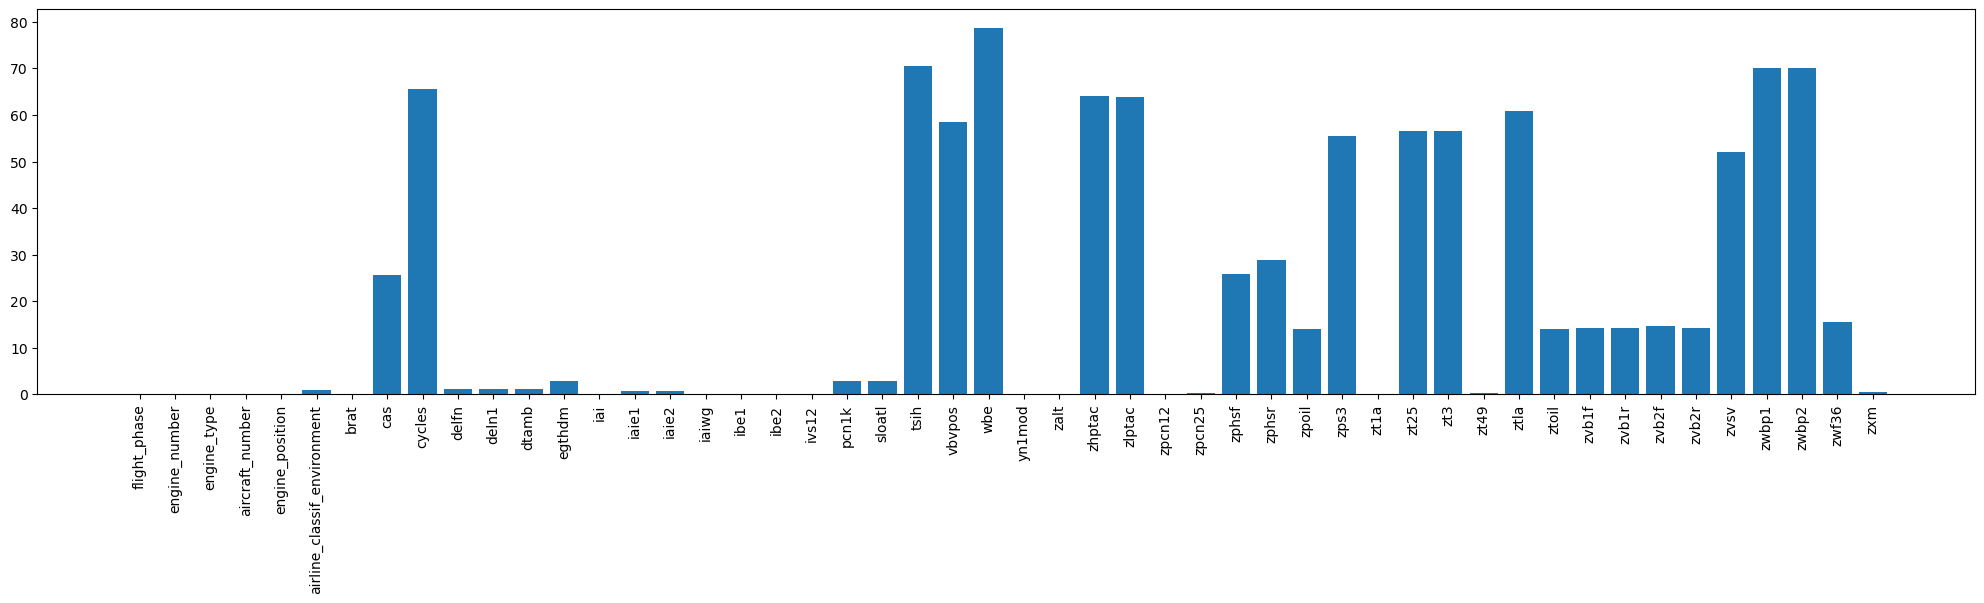

In [8]:
plt.figure(figsize=(25,5))
plt.bar(df.columns,df.isna().mean()*100)
plt.xticks(rotation=90)

#### 1.3. Ne gardez que les lignes où le nombre de cycles (variable `cycles`) et la marge EGT (variable `egthdm`) sont présentes.

In [9]:
df=df.dropna(subset=["cycles","egthdm"])
df

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
104,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,5.0,23.8191,...,84.3,0.39,0.58,0.05,0.15,12.3,0.2,0.0,NaN,0.133
105,TAKEOFF,186,10,192,1,Neutral,0.0,93.0,6.0,25.4038,...,95.1,0.24,0.69,0.16,0.10,11.1,0.2,0.0,NaN,0.148
106,TAKEOFF,186,10,192,1,Neutral,0.0,92.0,7.0,22.7509,...,81.6,0.23,0.46,0.13,0.11,12.1,0.3,0.0,NaN,0.140
107,TAKEOFF,186,10,192,1,Neutral,0.0,87.0,8.0,22.1533,...,87.8,0.59,0.80,0.12,0.13,11.1,0.2,0.0,NaN,0.140
108,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,9.0,23.8673,...,79.3,0.43,0.47,0.13,0.17,12.5,0.3,0.0,NaN,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46575,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,19.0,13.0466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292
46576,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,44.0,12.7586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286
46577,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,67.0,14.8291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304
46599,TAKEOFF,328,7,154,2,Neutral,1.0,NaN,32.0,12.7096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286


#### 1.4. Affichez les différents types de moteurs (indice : utilisez la méthode `unique()`).

In [10]:
df["engine_type"].unique()

array([10,  5,  7])

#### 1.5. Sélectionnez uniquement les moteurs de type 10. Combien y a-t-il d'avions distincts ? Combien de vols par avion ? (attention : il y a 2 moteurs sur un avion)

In [11]:
df2=df[df["engine_type"]==10]
df2

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
104,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,5.0,23.8191,...,84.3,0.39,0.58,0.05,0.15,12.3,0.2,0.0,NaN,0.133
105,TAKEOFF,186,10,192,1,Neutral,0.0,93.0,6.0,25.4038,...,95.1,0.24,0.69,0.16,0.10,11.1,0.2,0.0,NaN,0.148
106,TAKEOFF,186,10,192,1,Neutral,0.0,92.0,7.0,22.7509,...,81.6,0.23,0.46,0.13,0.11,12.1,0.3,0.0,NaN,0.140
107,TAKEOFF,186,10,192,1,Neutral,0.0,87.0,8.0,22.1533,...,87.8,0.59,0.80,0.12,0.13,11.1,0.2,0.0,NaN,0.140
108,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,9.0,23.8673,...,79.3,0.43,0.47,0.13,0.17,12.5,0.3,0.0,NaN,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45809,TAKEOFF,180,10,190,2,Neutral,0.0,86.0,48.0,24.0682,...,95.4,0.03,0.41,0.49,0.64,12.4,0.0,0.0,NaN,0.132
45810,TAKEOFF,180,10,190,2,Neutral,0.0,86.0,58.0,19.5614,...,87.7,0.02,0.37,0.35,0.50,11.8,0.0,0.0,NaN,0.133
46111,TAKEOFF,179,10,190,1,Neutral,0.0,87.0,163.0,23.3822,...,93.0,0.13,0.23,0.17,0.18,11.5,0.0,0.0,NaN,0.141
46411,TAKEOFF,179,10,190,1,Neutral,0.0,85.0,30.0,22.6940,...,96.6,0.13,0.51,0.23,0.11,12.3,0.0,0.0,NaN,0.130


In [12]:
len(df2["aircraft_number"].unique())

5

In [13]:
liste=df2["aircraft_number"].unique()
liste

array([192,  14,  11, 190, 191])

In [14]:
mp=len(df2[df2["aircraft_number"]==192])
mp

252

In [15]:
mp

252

In [16]:
L2=[]
for i in liste:
    L2=L2+[len(df2[df2["aircraft_number"]==i])/2]
    
print(L2)

[126.0, 97.0, 17.0, 110.0, 6.0]


## 2. Étude de la marge EGT de l'avion 190

#### 2.1. Récupérez les variables `engine_number`, nombre de cycles (`cycles`) et marge EGT (`egthdm`) pour l'avion identifié par le numéro 190.

In [17]:
df3=df2[df2["aircraft_number"]==190]
df4=df3[["engine_number","cycles","egthdm"]]
df4

,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11399,180,69.0,57.6415
11400,180,75.0,48.7217
11755,179,0.0,37.6572
11756,179,1.0,37.2208
...,...,...,...
45809,180,48.0,51.9444
45810,180,58.0,59.0032
46111,179,163.0,45.8711
46411,179,30.0,56.5585


In [18]:
#df4.reset_index(inplace=True)

In [19]:
df4
df5=df4[df4["engine_number"]==179]
df6=df4[df4["engine_number"]==180]


In [20]:
df5

,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11755,179,0.0,37.6572
11756,179,1.0,37.2208
11757,179,2.0,40.2041
11758,179,3.0,42.7922
...,...,...,...
45523,179,77.0,51.8369
45808,179,35.0,49.2379
46111,179,163.0,45.8711
46411,179,30.0,56.5585


In [21]:
df6

,engine_number,cycles,egthdm
11399,180,69.0,57.6415
11400,180,75.0,48.7217
11780,180,0.0,46.3442
11781,180,1.0,43.2150
11782,180,2.0,46.5094
...,...,...,...
45234,180,38.0,59.9147
45524,180,15.0,58.3166
45525,180,45.0,58.0780
45809,180,48.0,51.9444


In [22]:
df5.sort_values(by="cycles",inplace=True)

/var/folders/fl/71zh2c117r9f2nwvtqmpm3nm0000gn/T/ipykernel_13182/1178526287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.sort_values(by="cycles",inplace=True)


In [23]:
df6.sort_values(by="cycles",inplace=True)

/var/folders/fl/71zh2c117r9f2nwvtqmpm3nm0000gn/T/ipykernel_13182/1483670610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.sort_values(by="cycles",inplace=True)


#### 2.2. Affichez la courbe de l'évolution de la marge EGT au cours du temps pour les deux moteurs de l'avion, sur deux graphes séparés et en prenant soin d'ajouter des légendes.

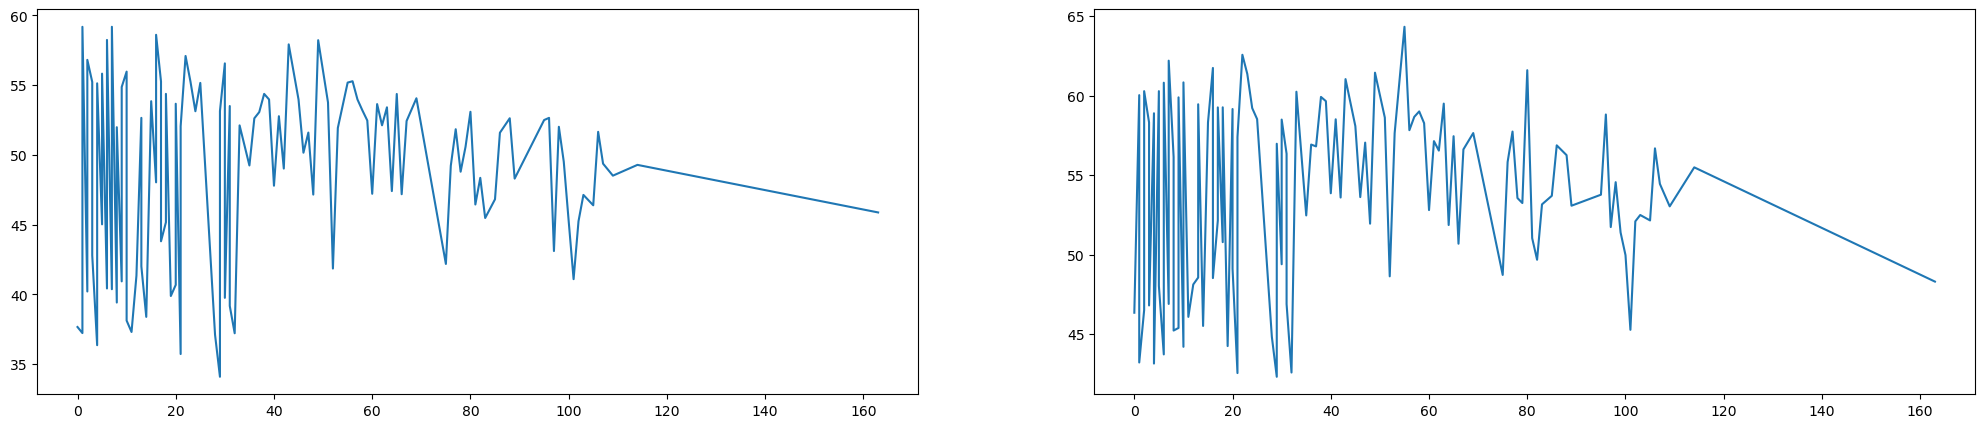

In [24]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(df5["cycles"],df5["egthdm"])

plt.subplot(1,2,2)
plt.plot(df6["cycles"],df6["egthdm"])


#### 2.3. Pour la suite, on ne s'intéresse qu'au moteur 179. Quel est le nombre de vols manquant dans les données ?

In [25]:
df_1 = pd.read_excel("./data/accars_b.xlsx")

In [39]:
df_2=df_1[df_1["engine_number"]==179]
df_3=df_2[["engine_number","cycles","egthdm"]]
df_3

,engine_number,cycles,egthdm
11300,179,7.0,NaN
11301,179,31.0,NaN
11398,179,98.0,52.0118
11625,179,1.0,NaN
11626,179,2.0,NaN
...,...,...,...
46111,179,163.0,45.8711
46318,179,102.0,NaN
46319,179,142.0,NaN
46411,179,30.0,56.5585


In [43]:
sum(df_3.isnull().sum(axis=1)!=0)
print(f"Il y a",sum(df_3.isnull().sum(axis=1)!=0),"vols manquants")

Il y a 166 vols manquants


#### 2.4. Nettoyage de la marge EGT

On constate que sur un même cycle, il peut y avoir 2 valeurs de la variable `egthdm` mesurées. On ne souhaite garder que la plus grande des deux, et avoir une seule ligne par cycle, afin que l'on puisse utiliser le nombre de cycles comme index. Enfin, on veut compléter l'index pour les vols manquants, en remplissant les lignes par `NaN`. Pour cela, effectuez l'exercice suivant:

1. Utilisez une aggrégation pour obtenir la plus grande valeur à chaque cycle et stockez le résultat dans une Series pandas appelée 'egt'.
2. Ré-indexez le DataFrame pour avoir une ligne pour tout nombre de cycles (indice : passez par la méthode reindex).

In [58]:
idx=[]
for i in range(int(max(df_3["cycles"]))):
    print(np.nanmax(df_3[df_3["cycles"]==i]["egthdm"]))

37.6572
59.1796
56.8104
55.2263
55.1283
55.8223
58.2392
59.1825
51.9821
54.8652
55.9666
37.3005
41.3393
52.6525
38.3837
53.8463
58.6072
55.2605
54.3729
39.8786
53.6643
52.0502
57.0891
55.2475
53.1277
55.1573
nan


/var/folders/fl/71zh2c117r9f2nwvtqmpm3nm0000gn/T/ipykernel_13182/2971140666.py:3: RuntimeWarning: All-NaN axis encountered
  print(np.nanmax(df_3[df_3["cycles"]==i]["egthdm"]))


ValueError: zero-size array to reduction operation maximum which has no identity

#### 2.5. On souhaite lisser les valeurs et se débarasser des outliers à l'aide d'une médiane glissante sur 15 cycles. Affichez sur un même graphe la marge EGT brute (points) et la marge lissée (ligne).
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling

Utilisez une fenêtre glissante de taille 15 cycles, avec un minimum de 3 observations non-nulles par fenêtre (paramètre `min_periods`).

#### 2.6. Nettoyage de la marge EGT lissée

La marge EGT ne peut être que décroissante, sauf en cas de nettoyage moteur (waterwash) ou peut-être à cause d'éléments extérieurs, on va donc éviter de tenir compte des remontées de marge et ne prendre en considération que les points descendants. Cette estimation est pessimiste mais évite de prendre en compte ces facteurs extérieurs.

1. Calculez une série ne contenant que les valeurs décroissantes de la amrge EGT lissée.
2. Sur le graphique précédent, ajoutez ces points par-dessus la courbe.

#### 2.7. Estimation de la pente de la marge EGT

La pente de la marge EGT est un indicateur très intéressant de l'usure du moteur. On l'estime par régression linéaire par rapport au nombre de cycles. Pour cela, on utilise les points conservés précédemment qui constituent une estimation pessimiste.

Pour la régression linéaire, on utilisera le modèle `LinearRegression` de scikit-learn. Son utilisation est similaire aux autres modèles de scikit-learn :
```python
lr = LinearRegression()
model = lr.fit(X, y)
```

1. Apprenez un modèle `LinearRegression` sur les données calculées précédemment. Affichez les coefficients et l'ordonnée à l'origine (_intercept_) du modèle obtenu. Les valeurs sont-elles cohérentes ? (indices : pour passer d'un objet pandas (DataFrame ou Series) à un array numpy, utilisez la propriété `values`)
2. Tracez la droite obtenue sur le graphe précédent.

In [28]:
from sklearn.linear_model import LinearRegression

### 3. Écriture d'une fonction de calcul de la pente EGT pour tous les moteurs

Tout d'abord, bravo si vous êtes arrivés jusque là ! Toutes les opérations que l'on a effectuées ont permis d'estimer la pente de la marge EGT du moteur 179 de l'avion 190 de type 10, et donc son usure. Maintenant, on souhaite répéter ce processus sur tous les moteurs ! Pour cela, il faudra créer une fonction Python générique, prenant en entrée l'ensemble du jeu de données ACARS et produisant en sortie l'ensemble des pentes/intercept des modèles de régression linéaire appris pour chaque moteur.

L'un des intérêts est de pouvoir prédire l'usure des moteurs, après un nombre de cycles donné.

Voici le squelette de la fonction à écrire (en ré-utilisant et adaptant tout les morceaux de code précédents) :

```python
def regress_egt_margin(df_acars):
    ...
    return df_regress_models # Contient les pentes et intercept pour tous les moteurs
```

### 4. Comparaison de l'usure des 3 types de moteurs

#### 4.1. Prédiction de la marge EGT au 150ème par type de moteur

1. Pour chaque moteur, utilisez son modèle de régression pour prédire la valeur de la marge EGT après 150 cycles d'utilisation (indice : méthode `apply`).
2. Représentez ces valeurs par type moteur sur un box plot. Décrivez le résultat obtenu.
3. Calculez la moyenne de la marge au 150ème cycle par type de moteur. Quel type de moteur a la plus grande marge moyenne après 150 cycles ?

#### 4.3. Vitesse de décroissance de la marge EGT par type de moteur

La pente de la marge EGT correspond à sa vitesse de décroissance par cycle.

1. Quelle est son unité ?
2. Représentez ces valeurs par type de moteur sur un boxplot. Décrivez le résultat obtenu.
3. Calculez moyenne de la pente par type de moteur. Quel type de moteur a la plus faible vitesse de décroissance et donc la plus faible vitesse d'usure ?